In [10]:
import numpy as np
import pandas as pd
from scipy import io
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sns
import scipy
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Feature_dataset_short.csv')
label_data = pd.read_csv('label_av_short.csv')

In [3]:
data

,MEAN,MED,MIN,MAX,STD,VAR,SKW,KURT,SE,LEE,PEAKS
0,375360.503664,378831.032486,-25212.644397,404458.558442,19148.071055,3.666486e+08,-3.998082,68.427342,18.813147,-9.406574,2825
1,414545.406197,413947.983165,367322.652605,475720.249705,30325.434445,9.196320e+08,0.453521,-0.827522,17.750236,-8.875118,1714
2,357804.430349,365321.709630,272774.357528,415386.030442,38342.335960,1.470135e+09,-0.601898,-0.661127,19.267139,-9.633569,3690
3,270967.004896,266974.123043,118824.844400,426344.200570,35526.441049,1.262128e+09,0.131543,-1.228120,18.464975,-9.232487,2405
4,292836.248774,293589.005572,118920.693012,346159.579310,30110.284158,9.066292e+08,-0.337374,-0.406457,19.332744,-9.666372,3625
...,...,...,...,...,...,...,...,...,...,...,...
635,237212.360944,238766.270969,118471.132366,309191.223847,12000.220646,1.440053e+08,-1.299876,5.855401,18.711181,-9.355590,2629
636,259779.929563,262765.972743,118726.188960,309641.105647,12389.436547,1.534981e+08,-1.027166,2.326245,19.133679,-9.566840,3312
637,304222.323747,305037.377255,255116.966827,353058.505768,17810.813130,3.172251e+08,0.035763,0.708773,18.005494,-9.002747,1781
638,183752.699074,183267.263203,139805.101823,324330.038025,13977.160568,1.953610e+08,0.505327,5.230169,18.929439,-9.464720,3069


In [4]:
label_data

,AV
0,LAHV
1,LAHV
2,HALV
3,LAHV
4,HALV
...,...
635,HAHV
636,HAHV
637,HAHV
638,HAHV


In [5]:
remove32 = data.drop(index = [636,637,638,639]) # 32번 참가자의 label 데이터가 없으므로 삭제하여 데이터 수 맞춰줌
feature_data = remove32.dropna(axis=0) # GSR 신호가 없는 행 삭제 
label = label_data.drop(index = [548,549,550,551]) # 28번 참가자의 GSR신호가 없으므로 해당 동영상 label 삭제하여 데이터 수 맞춰줌

In [22]:
X = feature_data.values
y = label.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 125)

In [8]:
X_train.shape

(508, 11)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

SVCpipe = Pipeline([('scale', StandardScaler()),
                  ('SVC',LinearSVC())])


param_grid = {'SVC__C':np.arange(0.01,1000,10)}
grid = GridSearchCV(SVCpipe,param_grid, cv=5,return_train_score=True)
grid.fit(X_train,y_train)
print(grid.best_score_)
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

0.34639875752281113
              precision    recall  f1-score   support

        HAHV       0.28      0.55      0.37        38
        HALV       0.31      0.36      0.34        44
        LAHV       0.00      0.00      0.00        25
        LALV       0.00      0.00      0.00        21

    accuracy                           0.29       128
   macro avg       0.15      0.23      0.18       128
weighted avg       0.19      0.29      0.23       128



In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


rf = Pipeline([('scale', RobustScaler()),
('RandomForest',RandomForestClassifier(random_state = 0))])


param_grid = {'RandomForest__n_estimators': np.arange(10,120,5),'RandomForest__max_depth': np.arange(3,7)}
grid = GridSearchCV(rf,param_grid, cv=5,return_train_score=True)

grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)


{'RandomForest__max_depth': 6, 'RandomForest__n_estimators': 35}
0.431100757134537


In [12]:
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        HAHV       0.45      0.55      0.49        38
        HALV       0.51      0.73      0.60        44
        LAHV       0.20      0.12      0.15        25
        LALV       0.67      0.10      0.17        21

    accuracy                           0.45       128
   macro avg       0.46      0.37      0.35       128
weighted avg       0.46      0.45      0.41       128



In [13]:
rf = RandomForestClassifier(random_state=0)
train_scores = []
test_scores = []

estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

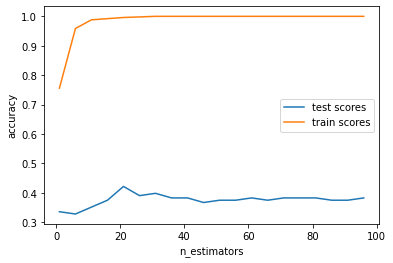

In [14]:
plt.plot(estimator_range, test_scores, label="test scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()
